In [1]:
import cv2
flags = [i for i in dir(cv2) if i.startswith('COLOR_')]
import matplotlib.pyplot as plt
import numpy as np
import skimage
import skimage.color, skimage.filters
import pandas as pd

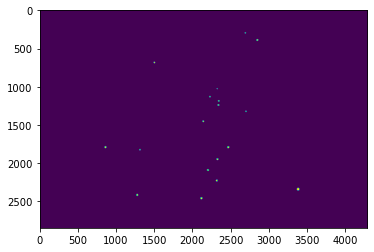

(2848, 4288)

In [8]:
path = 'train_microaneurysms/IDRiD_01_MA.tif'
nemo = cv2.imread(path)
grayscale = skimage.color.rgb2gray(nemo)
plt.imshow(grayscale)
plt.show()
thresh = skimage.filters.threshold_otsu(grayscale)
binary = grayscale > thresh
binary.shape

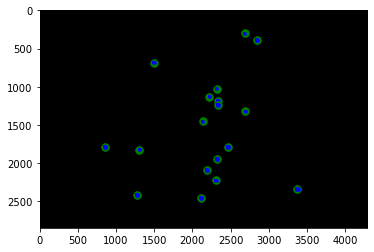

25 28


In [12]:
import math
from skimage.draw import ellipse
from skimage.measure import label, regionprops
from skimage.transform import rotate
from skimage import util 

label_img = label(opening)
regions = regionprops(label_img)

fig, ax = plt.subplots()
ax.imshow(opening, cmap=plt.cm.gray)

for props in regions:
    y0, x0 = props.centroid
    orientation = props.orientation
    x1 = x0 + math.cos(orientation) * 0.5 * props.major_axis_length
    y1 = y0 - math.sin(orientation) * 0.5 * props.major_axis_length
    x2 = x0 - math.sin(orientation) * 0.5 * props.minor_axis_length
    y2 = y0 - math.cos(orientation) * 0.5 * props.minor_axis_length

    ax.plot((x0, x1), (y0, y1), '-r', linewidth=2.5)
    ax.plot((x0, x2), (y0, y2), '-r', linewidth=2.5)
    ax.plot(x0, y0, '.g', markersize=15)

    minr, minc, maxr, maxc = props.bbox
    bx = (minc, maxc, maxc, minc, minc)
    by = (minr, minr, maxr, maxr, minr)
    ax.plot(bx, by, '-b', linewidth=2.5)

ax.axis((0, binary.shape[1], binary.shape[0], 0))
plt.show()

print((maxr -minr), (maxc- minc))

In [13]:
props = skimage.measure.regionprops_table(label_img, properties=('centroid',
                                                 'major_axis_length',
                                                 'minor_axis_length', 
                                                 'area', 
                                                 'convex_area',
                                                 'bbox_area', 
                                                 ))

In [14]:
pd.DataFrame(props)

,centroid-0,centroid-1,major_axis_length,minor_axis_length,area,convex_area,bbox_area
0,297.582353,2684.288235,15.526293,13.967693,170,178,224
1,390.937349,2840.561446,23.899201,22.247488,415,424,506
2,684.776173,1494.790614,20.605049,17.162875,277,287,361
3,1026.500000,2316.000000,11.213346,10.517067,92,100,132
4,1131.022026,2221.074890,18.759385,15.429999,227,236,285
5,1186.297794,2335.988971,19.417104,17.859647,272,281,360
6,1240.111782,2332.154079,21.929331,19.266901,331,341,399
7,1323.225131,2692.251309,16.343036,14.929677,191,199,240
8,1452.794953,2133.700315,20.374128,19.831380,317,327,400
9,1790.972281,854.863539,25.059885,24.006907,469,481,576
